In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import fetch_openml

seed = 1234
np.random.seed(seed)  

In [218]:
X, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)

# When y is NOT binarized
X_test, X_train_val, y_test, y_train_val = train_test_split(X, y, test_size=0.8, random_state=seed) # TODO don't shuffle ???
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=seed) # TODO don't shuffle

# When y is binarized
y_binary = label_binarize(y, classes=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
X_test, X_train_val, y_bin_test, y_bin_train_val = train_test_split(X, y_binary, test_size=0.8, random_state=seed) # TODO don't shuffle ???
X_train, X_valid, y_bin_train, y_bin_valid = train_test_split(X_train_val, y_bin_train_val, test_size=0.25, random_state=seed) # TODO don't shuffle

In [219]:
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

## KNN Classifier ROC/AUC

In [239]:
knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train, y_bin_train)   

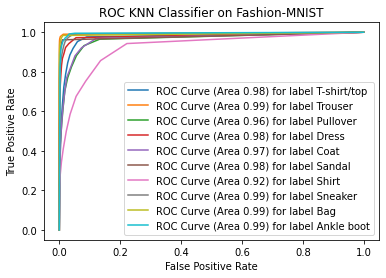

In [221]:
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = y_binary.shape[1]
y_scores = knn.predict_proba(X_valid) # NOTE: KNeighborsClassifer does not have decision_function

for i in range(num_labels): # loops through the number of labels (aka 10)
    fpr[i], tpr[i], _ = roc_curve(y_bin_valid[:, i], y_scores[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC KNN Classifier on Fashion-MNIST")
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Area {round(roc_auc[i], 2)}) for label {labels[i]}')
    plt.legend(loc="best")

plt.show()

## Logistic Regression Classifier ROC/AUC

In [242]:
logistic_model = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2')
logistic_model.fit(X_train, y_train)

/home/paolopedrigal/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, max_iter=10, solver='newton-cg')

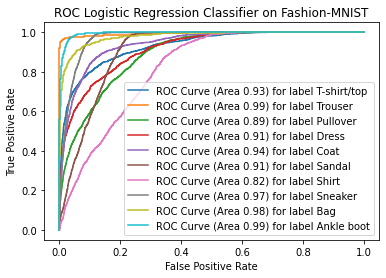

In [248]:
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = y_binary.shape[1]
y_scores = logistic_model.decision_function(X_valid) 

for i in range(num_labels): # loops through the number of labels (aka 10)
    fpr[i], tpr[i], _ = roc_curve(y_bin_valid[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Logistic Regression Classifier on Fashion-MNIST")
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Area {round(roc_auc[i], 2)}) for label {labels[i]}')
    plt.legend(loc="best")

## Neural Networks Classifier ROC/AUC

In [226]:
nn_model = MLPClassifier(activation = "relu",learning_rate = "invscaling",hidden_layer_sizes = (400, 200,100,50,))
nn_model.fit(X_train, y_bin_train) 

MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50),
              learning_rate='invscaling')

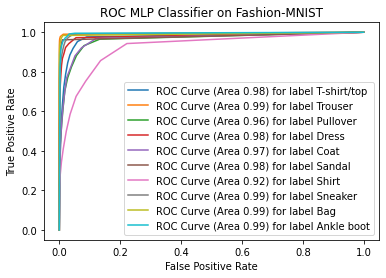

In [227]:
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = y_binary.shape[1]
y_scores = knn.predict_proba(X_valid) # NOTE: MLPClassifer does not have decision_function

for i in range(num_labels): # loops through the number of labels (aka 10)
    fpr[i], tpr[i], _ = roc_curve(y_bin_valid[:, i], y_scores[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC MLP Classifier on Fashion-MNIST")
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Area {round(roc_auc[i], 2)}) for label {labels[i]}')
    plt.legend(loc="best")

plt.show()

## Random Forest Classifier ROC/AUC

In [229]:
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features = "log2", max_depth = 100, criterion = "log_loss")
rf_model.fit(X_train, y_bin_train)

RandomForestClassifier(criterion='log_loss', max_depth=100, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10)

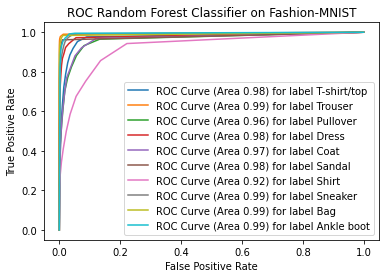

In [230]:
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = y_binary.shape[1]
y_scores = knn.predict_proba(X_valid) # NOTE: RandomForestClassifier does not have decision_function

for i in range(num_labels): # loops through the number of labels (aka 10)
    fpr[i], tpr[i], _ = roc_curve(y_bin_valid[:, i], y_scores[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Random Forest Classifier on Fashion-MNIST")
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Area {round(roc_auc[i], 2)}) for label {labels[i]}')
    plt.legend(loc="best")

plt.show()